<a href="https://www.kaggle.com/code/joeportilla/viajes-en-bicicleta-por-londres-eda?scriptVersionId=124972707" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 0. Introducción

<img src="https://raw.githubusercontent.com/JoePortilla/LondonBikeSharing-EDA/main/img/BikeSharing_eda_cover.png" width="800" alt="logo" style="display:block;margin:auto;">

- El dataset `Londres Bike Sharing` es un conjunto de datos históricos que contiene información detallada sobre el uso del sistema de bicicletas compartidas de Londres.
- El conjunto de datos incluye datos horarios de uso de bicicletas para cada estación de bicicletas en Londres, desde enero de 2015 hasta enero de 2017.
- Los datos incluyen el tiempo de inicio y finalización de cada viaje, la duración del viaje, la estación de inicio y fin del viaje, la temperatura, la humedad y las condiciones climáticas en el momento del viaje. 
- Este conjunto de datos es ideal para el análisis y la modelización de la demanda de bicicletas compartidas en una ciudad, así como para la identificación de patrones de uso y tendencia

## Objetivo general
Construir un modelo para predecir la demanda futura de bicicletas compartidas en la ciudad de Londres.

## Objetivo especifico
Este notebook se centra en explorar y visualizar el conjunto de datos.
- Realizar un análisis exploratorio de datos para comprender los datos y elegir las mejores características. 
- Encontrar los factores que influyen en la reserva de las bicicletas, y la relación entre la temporada, el clima o el día laborable.

## Paquetes utilizados:
- Procesamiento de datos
    - Pandas.
- Visualización de datos
    - Seaborn
    - Matplotlib.

## Referencias:
- -

## Instructor:
Joseph Santiago Portilla - Ingeniero Electrónico.
- GitHub: https://github.com/JoePortilla
- Twitter: https://twitter.com/JoePortilla
- LinkedIn: https://www.linkedin.com/in/PortillaJoe
- Kaggle: https://www.kaggle.com/joeportilla


# 1. Ajustes Iniciales

## 1.1 Importación de Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Definición de estilo de gráficas

In [2]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-whitegrid")

# 2. Carga de Dataset y Revisión inicial

## 2.1. Lectura de CSV

In [3]:
df = pd.read_csv('/kaggle/input/london-bike-sharing-dataset/london_merged.csv')

## 2.2. Exploración inicial del dataframe

### Info. general del dataset

El conjunto de datos de Londres Bike Sharing contiene las siguientes variables:

- timestamp: La fecha y hora del registro de viaje (en formato de fecha y hora).
- cnt: El número total de bicicletas alquiladas en esa fecha y hora (entero).
- t1: Temperatura [°C] (float).
- t2: Temperatura "percibida" [°C] (float).
- hum: Humedad relativa [%] (entero).
- wind_speed: Velocidad del viento [Km/h] (entero).
- weather_code: Un código numérico que representa el tipo de tiempo meteorológico en el momento del viaje (entero).
    - 1: Cielo despejado.
    - 2: Pocas nubes.
    - 3: Parcialmente nublado
    - 4: Nublado
    - 7: Lluvia
    - 10: Tormenta eléctrica
    - 26: Nevada
    - 94: Lluvia helada
- is_holiday: Un valor booleano que indica si el viaje coincide con un día festivo en Londres
    - 1: Festivo
    - 0: No es festivo.
- is_weekend: Un valor booleano que indica si el viaje es durante el fin de semana.
    - 1: Fin de semana
    - 0: No es fin de semana.
- season: Un valor numérico que representa la estación en la que se realizó el viaje.
    - 0: Primavera
    - 1: Verano
    - 2: Otoño
    - 3: Invierno

In [4]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


A excepción del registro de fecha, todos los datos son de tipo númerico

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


### Dimensión del datafrane

In [6]:
df.shape

(17414, 10)

### Comprobación de valores faltantes

El dataset esta completo y no cuenta con valores faltantes

In [7]:
df.isnull().sum(axis=0)

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

## 3. Preprocesamiento

### Renombramiento de columnas 

Se renombran las columnas para facilitar su interpretación y uso.

In [8]:
df.rename(columns={'t1':'temp',
                   't2':'temp_feels',
                   'hum':'rh',
                   'wind_speed':'wind',
                   'cnt':'bookings',
                   'weather_code': 'weather',
                   'is_holiday': 'holiday',
                   'is_weekend':'weekend'},
          inplace=True)

### Conversión de timestamp. De cadena de caracteres a formato de fecha y hora

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [10]:
df.dtypes

timestamp     datetime64[ns]
bookings               int64
temp                 float64
temp_feels           float64
rh                   float64
wind                 float64
weather              float64
holiday              float64
weekend              float64
season               float64
dtype: object

### Dataframe preprocesado

In [11]:
df.head(3)

,timestamp,bookings,temp,temp_feels,rh,wind,weather,holiday,weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


# 4. Análisis Univariado

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bookings,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
temp,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
temp_feels,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
rh,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


**Observaciones**
- `Season, Holiday, Weekend, Weather`: A pesar de presentarse como numericas, por naturaleza son categóricas.
- La temperatura real media es de unos 12.5 °C mientras que la temperatura que se percibe es de unos 11,5 °C.
- La media de ciclistas por hora es de unos 1143, pero el valor máximo es de 7860, por lo que hay indicios de outliers.

## 4.1. Registros

- La media de viajes por hora es de 844.
- Es visible que hay outliers, presentes después de 4000 viajes por hora.

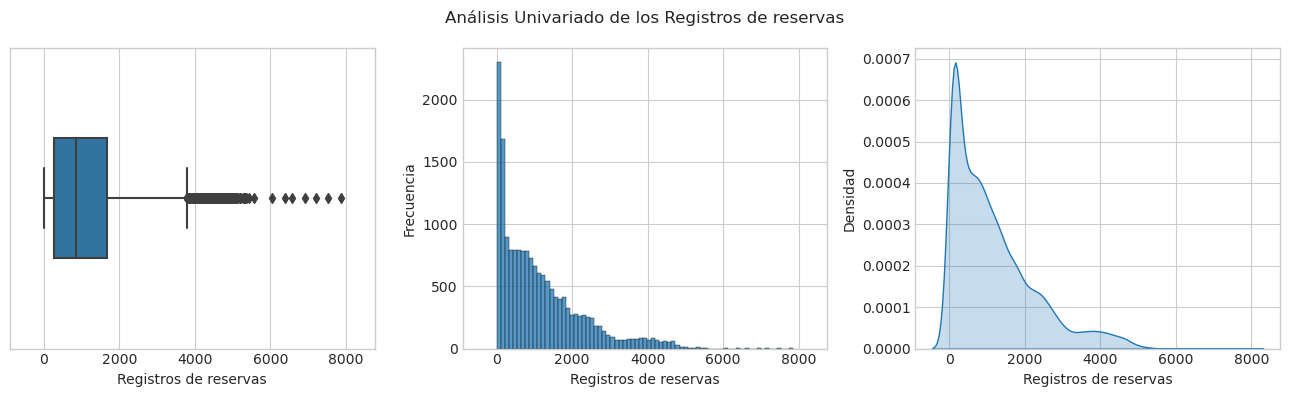

In [13]:
var = 'bookings'
var_title = 'Registros de reservas'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x=var, ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df, x=var, ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df, x=var, ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de los ' + var_title)

plt.tight_layout()

### 4.1.1. Registros por estación.

Aproximadamente las cuatro estaciones del año comparten igual cantidad de registros

In [14]:
df['season'].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

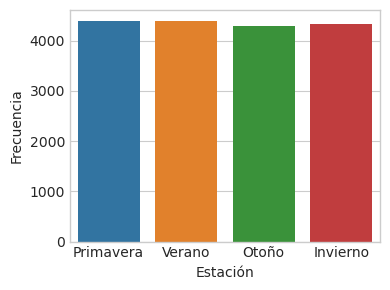

In [15]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.countplot(data=df, x='season', ax=ax)
ax.set_xlabel('Estación')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['Primavera', 'Verano', 'Otoño', 'Invierno'])

plt.tight_layout()

### 4.1.2. Registros por tiempo meteorológico.

- Los códigos meteorológicos 26 (Nevada) y 10 (Tormenta eléctrica) tienen un número muy inferior de registros. 
- Esto claramente indica que los ciclistas no se movilizan cuando hay una lluvia intensa o esta nevando.

In [16]:
df['weather'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather, dtype: int64

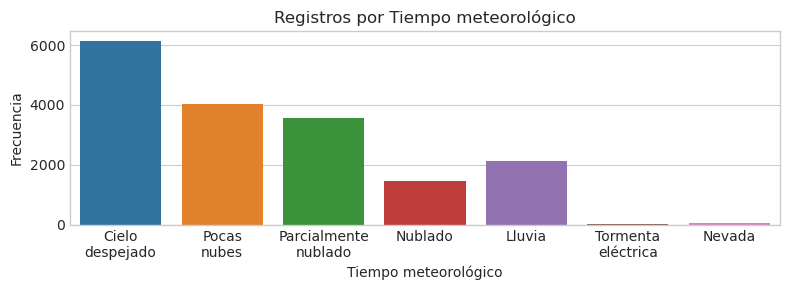

In [17]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.countplot(data=df, x='weather', ax=ax)
ax.set_xlabel('Tiempo meteorológico')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['Cielo\ndespejado', 'Pocas\nnubes', 'Parcialmente\nnublado', 'Nublado', 'Lluvia', 'Tormenta\neléctrica', 'Nevada'])
plt.title('Registros por Tiempo meteorológico')

plt.tight_layout()

En promedio las reservas se hacen cuando el tipo de tiempo meteorológico 1, 2 y 3.

In [18]:
df.groupby('weather').mean()['bookings']

weather
1.0     1162.088943
2.0     1496.177491
3.0     1195.124472
4.0      635.230874
7.0      712.966371
10.0     583.428571
26.0     250.850000
Name: bookings, dtype: float64

- Se utiliza barplot en lugar de countplot para representar la media de la variable `bookings` por cada valor de la variable `weatehr`.
- countplot se utiliza para contar el número de veces que aparece cada valor de la variable en el conjunto de datos, mientras que barplot se utiliza para mostrar la media de una variable numérica agrupada por otra variable categórica.

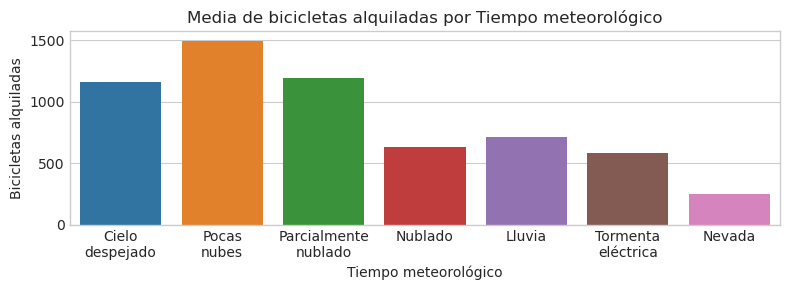

In [19]:
fig, ax = plt.subplots(figsize=(8, 3))

df_mean = df.groupby('weather').mean()
sns.barplot(data=df_mean.reset_index(), x='weather', y='bookings', ax=ax)
ax.set_xlabel('Tiempo meteorológico')
ax.set_ylabel('Bicicletas alquiladas')
ax.set_xticklabels(['Cielo\ndespejado', 'Pocas\nnubes', 'Parcialmente\nnublado', 'Nublado', 'Lluvia', 'Tormenta\neléctrica', 'Nevada'])
plt.title('Media de bicicletas alquiladas por Tiempo meteorológico')

plt.tight_layout()

### 4.1.3. Registros por tipo de día.

Hay muchos más Registros en los días que no son festivos.

In [20]:
df['holiday'].value_counts()

0.0    17030
1.0      384
Name: holiday, dtype: int64

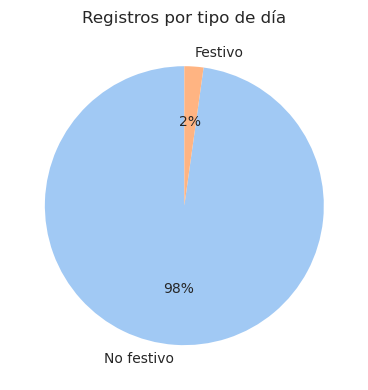

In [21]:
count = df['holiday'].value_counts()
labels = ['No festivo', 'Festivo']

fig, ax = plt.subplots(figsize=(4, 4))
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Registros por tipo de día');

plt.tight_layout()

La mayoría de reservas se da en los días laborales.

In [22]:
df['weekend'].value_counts()

0.0    12444
1.0     4970
Name: weekend, dtype: int64

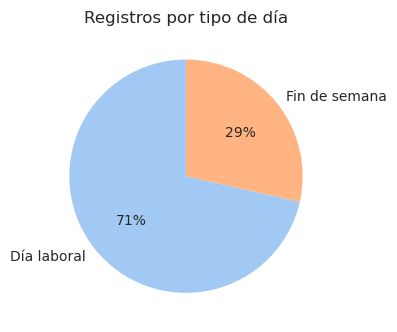

In [23]:
count = df['weekend'].value_counts()
labels = ['Día laboral', 'Fin de semana']

fig, ax = plt.subplots(figsize=(4, 4))
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Registros por tipo de día');

plt.tight_layout()

## 4.2. Variables meteorológicas

### 4.2.1. Temperatura.

- La temperatura media de Londres es de 12.5°C.
- Hay gran cantidad de outliers con temperaturas mayores a 28°C.

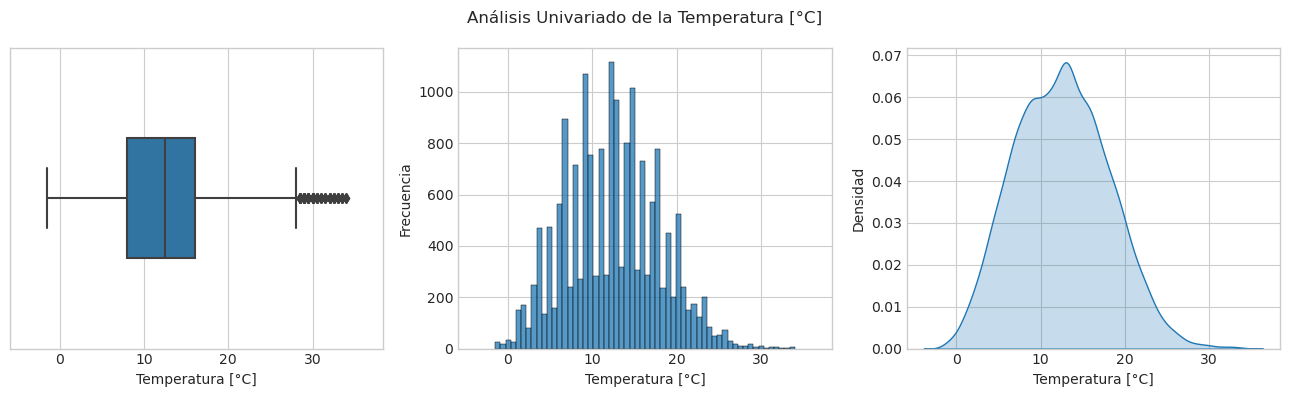

In [24]:
var = 'temp'
var_title = 'Temperatura [°C]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x=var, ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df, x=var, ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df, x=var, ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### 4.2.2. Temperatura percibida.

- La temperatura media percibida en Londres es de 12.5°C, igual a la temperatura real.
- La distribución de la temperatura percibida es multimodal.
- Hay gran cantidad de outliers con temperaturas percibidas mayores a 31°C.

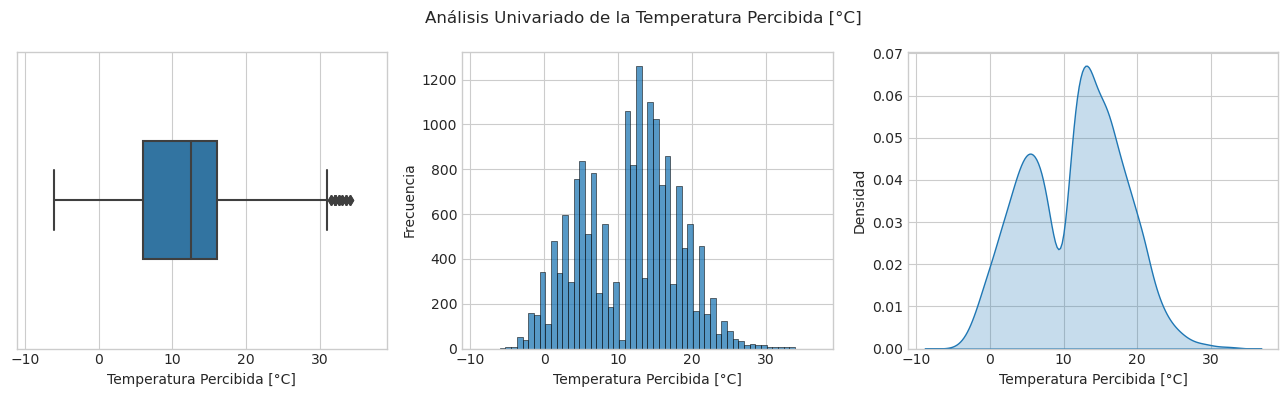

In [25]:
var = 'temp_feels'
var_title = 'Temperatura Percibida [°C]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x=var, ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df, x=var, ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df, x=var, ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### 4.2.3. Humedad relativa.

- La humedad relativa de Londres es en general alta, con una media de 75%.
- Hay gran cantidad de outliers en valores de humedad menores a 35%.

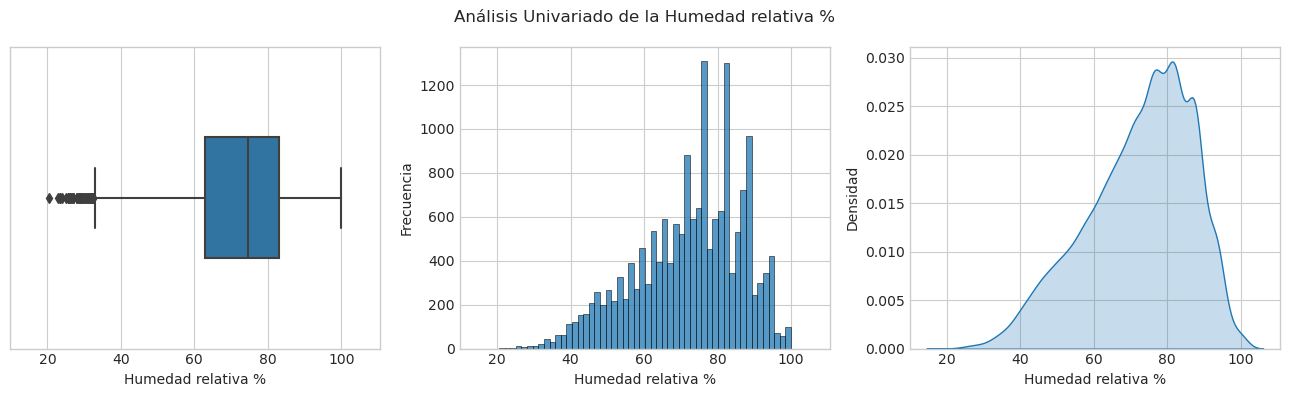

In [26]:
var = 'rh'
var_title = 'Humedad relativa %'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x=var, ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df, x=var, ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df, x=var, ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### 4.2.4. Velocidad del viento.

- La velocidad de viento media en Londres es de 15 Km/h.
- Existe gran cantidad de outliers con rafagas de viento superiores a 37 Km/h.

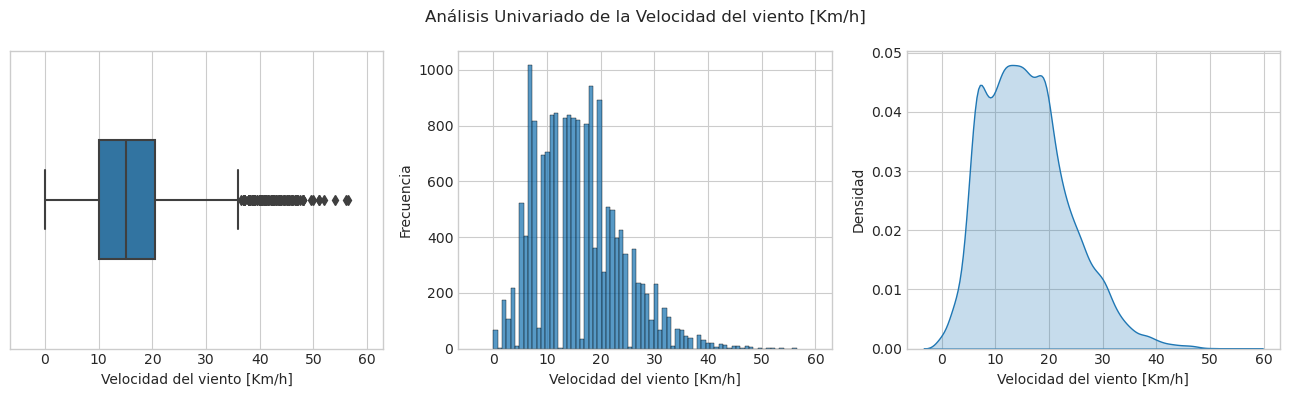

In [27]:
var = 'wind'
var_title = 'Velocidad del viento [Km/h]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x=var, ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df, x=var, ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df, x=var, ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

## 4.3. Tendencias por fecha

In [28]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour
df.head()

,timestamp,bookings,temp,temp_feels,rh,wind,weather,holiday,weekend,season,year,month,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4


### 4.3.1. Conteo por año

- Los registros por año son similares
- El año 2017 solo cuenta con 3 días de datos por lo que no se podría sacar conclusiones de este.

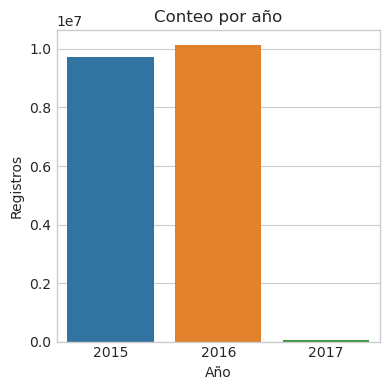

In [29]:
df_year = df.groupby(['year'])['bookings'].sum()

fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(data=df_year.reset_index(), x='year', y='bookings')
ax.set_xlabel('Año')
ax.set_ylabel('Registros')
plt.title('Conteo por año')

plt.tight_layout()

### 4.3.2. Conteo por mes

- Los viajes en bicicleta suelen tener menor frecuencia entre noviembre a febrero, esto se da por la estación invernal en esta temporada del año.

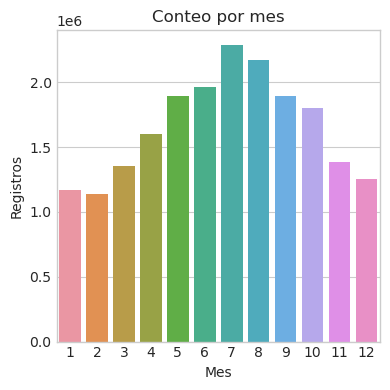

In [30]:
df_month = df.groupby(['month'])['bookings'].sum()

fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(data=df_month.reset_index(), x='month', y='bookings')
ax.set_xlabel('Mes')
ax.set_ylabel('Registros')
plt.title('Conteo por mes')

plt.tight_layout()

### 4.3.3. Conteo por hora

- Los viajes tienen un pico de frecuencia a las horas de entrada y salida del trabajo, que corresponden a las 8AM y las 6PM.
- En el transcurso de la mañana y tarde hay una tendencia de viajes constante.
- En la madrugada los viajes son mínimos.

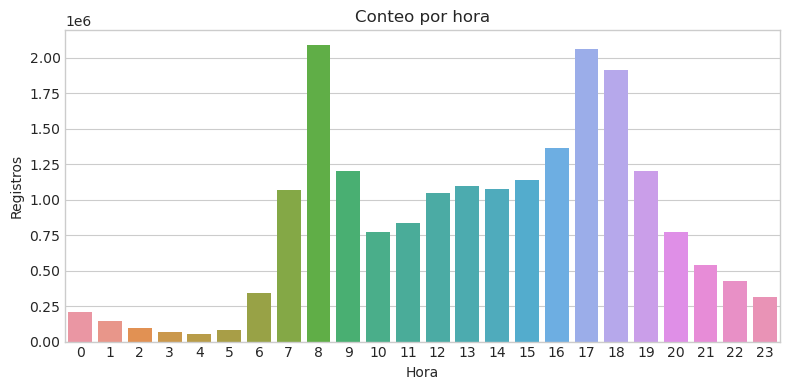

In [31]:
df_hour = df.groupby(['hour'])['bookings'].sum()

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df_hour.reset_index(), x='hour', y='bookings')
ax.set_xlabel('Hora')
ax.set_ylabel('Registros')
plt.title('Conteo por hora')

plt.tight_layout()

# 5. Análisis Multivariado

## 5.1. Recuento por estación del año y condiciones meteorológicas

- En general, la tendencia de viajes por condición meteorológica es la misma en todas las estaciones.
- Cuando no hay lluvia y el cielo no esta nublado hay más reservas que en las demás condiciones.

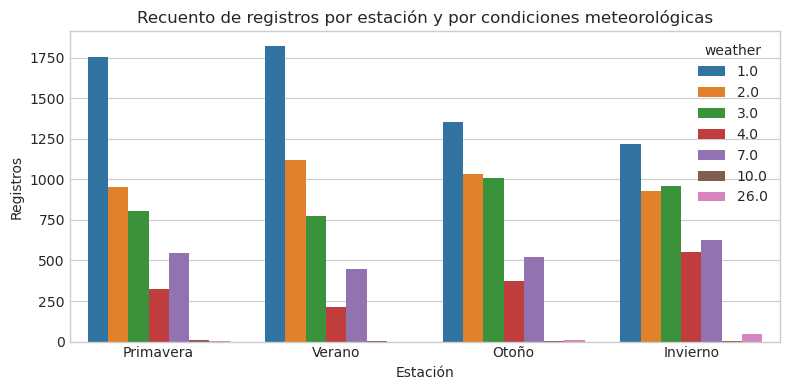

In [32]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x='season', hue='weather',)
plt.title('Recuento de registros por estación y por condiciones meteorológicas')
ax.set_xlabel('Estación')
ax.set_ylabel('Registros')
ax.set_xticklabels(['Primavera', 'Verano', 'Otoño', 'Invierno'])
plt.tight_layout()

## 5.2. Viajes en función de la temperatura

- Hay una distribución uniforme del recuento de registro de viajes en todas las temperaturas.

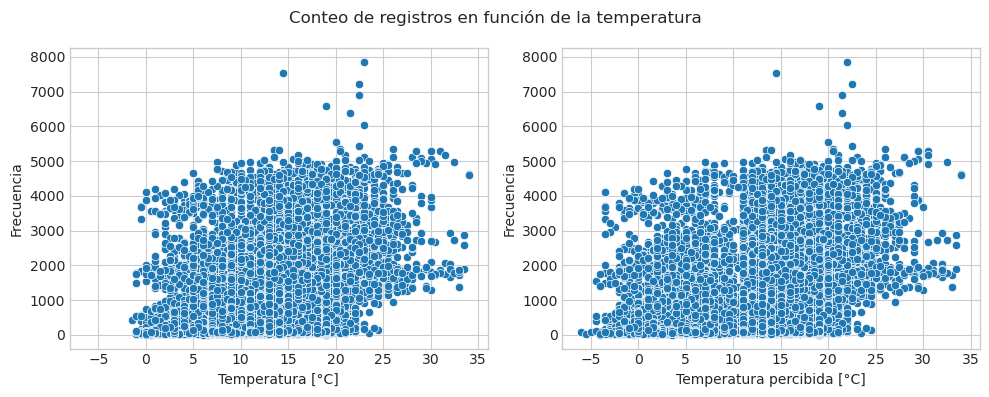

In [33]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

sns.scatterplot(data=df, x='temp', y='bookings', ax=ax[0])
ax[0].set_xlabel('Temperatura [°C]')
ax[0].set_ylabel('Frecuencia')

sns.scatterplot(data=df, x='temp_feels', y='bookings', ax=ax[1])
ax[1].set_xlabel('Temperatura percibida [°C]')
ax[1].set_ylabel('Frecuencia')

fig.suptitle('Conteo de registros en función de la temperatura')

plt.tight_layout()

## 5.3. Viajes en función de la humedad

- Hay un pequeño incremento de viajes cuando la humedad es baja.

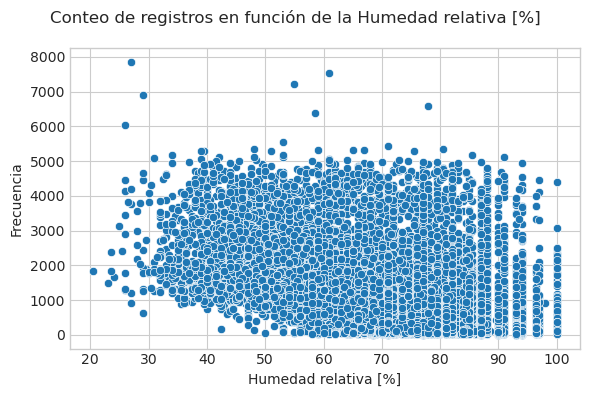

In [34]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(data=df, x='rh', y='bookings')
ax.set_xlabel('Humedad relativa [%]')
ax.set_ylabel('Frecuencia')
fig.suptitle('Conteo de registros en función de la Humedad relativa [%]')

plt.tight_layout()

## 5.4. Viajes en función de la velocidad del viento

- El número de viajes en bicicleta disminuye bastante cuando el viento es fuerte.

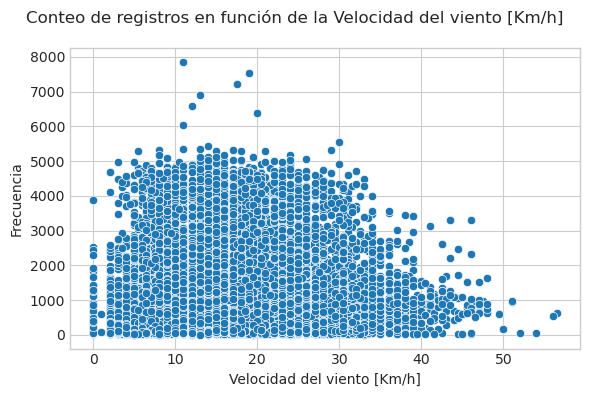

In [35]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(data=df, x='wind', y='bookings')
ax.set_xlabel('Velocidad del viento [Km/h]')
ax.set_ylabel('Frecuencia')
fig.suptitle('Conteo de registros en función de la Velocidad del viento [Km/h]')

plt.tight_layout()

# 6. Conclusiones EDA

- El dataset no tiene valores faltantes.
- En la mayoría de atributos se presentan outliers, por lo que antes de desarrollar modelos de predicción se debe realizar un preprocesamiento para eliminarlos.
- Meses como diciembre, enero y febrero tienen menos reservas, se podría ofrecer un descuento para obtener más clientes durante meses invernales.
- Más usuarios están reservando la bicicleta cuando la humedad es menor, por lo que se podría proporcionar una oferta para añadir un refresco durante la epoca húmeda.
- En días laborables hay muchas más reservas, se podría presentar una oferta durante los fines de semana o festivos para atraer más clientes durante estos días.